In [95]:
# Import libraries and set pandas options
%matplotlib inline

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

## Reading In/Cleaning Data

In [5]:
# Read in data
df = pd.read_csv('../03_pre/Top_1_000_Songs_To_Hear_Before_You_Die.csv')
df.head()

,THEME,TITLE,ARTIST,YEAR,SPOTIFY_URL
0,Love,The Look of Love,ABC,1982,http://open.spotify.com/track/78j3qTBdzcIiT3eS...
1,Love,The Shining,Badly Drawn Boy,2000,http://open.spotify.com/track/2PojSoZ94AIzp7fs...
2,Love,God Only Knows,The Beach Boys,1966,http://open.spotify.com/track/0ObrXLrfrqJUNc8R...
3,Love,Good Vibrations,The Beach Boys,1966,http://open.spotify.com/track/2oF7FZHIJbzjeEXZ...
4,Love,Wouldn’t It Be Nice,The Beach Boys,1966,http://open.spotify.com/track/0cx32rX0uZvcJUP9...


In [6]:
# Drop spotify url

df.drop('SPOTIFY_URL', axis = 1, inplace = True)
df.head()

,THEME,TITLE,ARTIST,YEAR
0,Love,The Look of Love,ABC,1982
1,Love,The Shining,Badly Drawn Boy,2000
2,Love,God Only Knows,The Beach Boys,1966
3,Love,Good Vibrations,The Beach Boys,1966
4,Love,Wouldn’t It Be Nice,The Beach Boys,1966


In [11]:
# Set Column Names to lower case 

# Method 1
# data.columns = map(str.lower, data.columns)

# Method 2
df.columns = [x.lower() for x in df.columns]
df.head()

,theme,title,artist,year
0,Love,The Look of Love,ABC,1982
1,Love,The Shining,Badly Drawn Boy,2000
2,Love,God Only Knows,The Beach Boys,1966
3,Love,Good Vibrations,The Beach Boys,1966
4,Love,Wouldn’t It Be Nice,The Beach Boys,1966


In [16]:
# General overview of data using describe

df.describe(include = "all") # Note include = "all" to include non-numeric summaries

,theme,title,artist,year
count,994,994,994,994.00000
unique,7,982,670,NaN
top,Party songs,I Want You,Bob Dylan,NaN
freq,162,3,24,NaN
mean,NaN,NaN,NaN,1978.05835
...,...,...,...,...
min,NaN,NaN,NaN,1916.00000
25%,NaN,NaN,NaN,1968.00000
50%,NaN,NaN,NaN,1977.00000
75%,NaN,NaN,NaN,1988.00000


## Filtering/Slicing

In [20]:
# Subset with mask

party_mask = df.theme == "Party songs"

party_music = df[party_mask]
party_music.head()

,theme,title,artist,year
496,Party songs,Din Daa Daa,George Kranz,1984
833,Party songs,Pacific State,808 State,1989
834,Party songs,Dancing Queen,Abba,1976
835,Party songs,Back in Black,AC/DC,1980
836,Party songs,Because I Got High,Afroman,2001


In [22]:
party_music.shape

(162, 4)

In [31]:
# Combine mask to see who was rocking party songs in the 80's
# eighties_mask = str(party_music.year).startswith('198')

party_music[df.year.str.startswith(198)] # Leaving in error as new pandas apparently doesn't support this

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [34]:
eighties_mask = (party_music.year > 1979) & (party_music.year < 1990) # Note don't use "and" use "&"

party_music[eighties_mask].head()

,theme,title,artist,year
496,Party songs,Din Daa Daa,George Kranz,1984
833,Party songs,Pacific State,808 State,1989
835,Party songs,Back in Black,AC/DC,1980
843,Party songs,Love Shack,The B-52’s,1989
845,Party songs,(You Gotta) Fight for Your Right (To Party),Beastie Boys,1987


In [35]:
eighties = party_music[eighties_mask]

eighties.describe(include = "all")

,theme,title,artist,year
count,47,47,47,47.000000
unique,1,47,45,NaN
top,Party songs,True Faith,Madonna,NaN
freq,47,1,2,NaN
mean,NaN,NaN,NaN,1983.531915
...,...,...,...,...
min,NaN,NaN,NaN,1980.000000
25%,NaN,NaN,NaN,1981.500000
50%,NaN,NaN,NaN,1983.000000
75%,NaN,NaN,NaN,1984.500000


# Indexing and loc

In [36]:
df.index

RangeIndex(start=0, stop=994, step=1)

In [37]:
df.iloc[500]

theme               Sex
title     Electric Feel
artist             MGMT
year               2008
Name: 500, dtype: object

In [38]:
df.iloc[400:450]

,theme,title,artist,year
400,People and places,Common People,Pulp,1995
401,People and places,"Bright Lights, Big City",Jimmy Reed,1961
402,People and places,Berlin,Lou Reed,1973
403,People and places,Roadrunner,Jonathan Richman and the Modern Lovers,1972
404,People and places,Harper Valley PTA,Jeannie C Riley,1968
...,...,...,...,...
445,Sex,Get Up (I Feel Like Being a) Sex Machine,James Brown,1970
446,Sex,Get On Top,Tim Buckley,1972
447,Sex,Orgasm Addict,Buzzcocks,1977
448,Sex,Triad,The Byrds,1968


In [40]:
# Now let's reset the index
df_title = df.set_index('title') # Note that df.set_index does not change "inplace"

df_title.index

Index([u'The Look of Love', u'The Shining', u'God Only Knows',
       u'Good Vibrations', u'Wouldn’t It Be Nice', u'Eight Days a Week',
       u'Girl', u'I Want to Hold Your Hand', u'She Loves You', u'Something',
       ...
       u'Cloud Nine', u'Great DJ', u'Disco Inferno', u'A Punk',
       u'Me and Baby Brother', u'Break Dance – Electric Boogie',
       u'My Generation', u'Last Night Changed It All',
       u'(Your Love Keeps Lifting Me) Higher and Higher',
       u'Turn Off the Lights'],
      dtype='object', name=u'title', length=994)

In [41]:
# Trying iloc again
df_title[500] #Nopes

KeyError: 500

In [42]:
df_title.iloc['Common People'] # Oh no, iloc does not work w/ string indexes

TypeError: cannot do positional indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [Common People] of <type 'str'>

In [44]:
df_title.loc['Common People'] # loc works for string indexes

theme     People and places
artist                 Pulp
year                   1995
Name: Common People, dtype: object

In [45]:
df_title.loc[['Common People']] # and as df

# Note there is also an 'ix' indexing call that works w/ label based with numerical fallback, but it is not recommended

,theme,artist,year
title,,,
Common People,People and places,Pulp,1995


In [46]:
# Let's sort by index and see what's up (should be alphabetical)
df_title.sort_index().head() # Can do df.sort_index(ascending = False) to get sorted the other way

,theme,artist,year
title,,,
"$1,000 Wedding",Heartbreak,Gram Parsons,1974
(Get Your Kicks On) Route 66,People and places,Nat King Cole,1946
(Love Is Like a) Heat Wave,Sex,Martha and the Vandellas,1963
(My Heart Is) Closed for the Season,Heartbreak,Bettye Swann,1968
(Sittin’ On) The Dock of the Bay,Life and death,Otis Redding,1968


In [50]:
df_title.reset_index(inplace = True) # resets index to rownums
df_title.head()

,index,title,theme,artist,year
0,0,The Look of Love,Love,ABC,1982
1,1,The Shining,Love,Badly Drawn Boy,2000
2,2,God Only Knows,Love,The Beach Boys,1966
3,3,Good Vibrations,Love,The Beach Boys,1966
4,4,Wouldn’t It Be Nice,Love,The Beach Boys,1966


## Apply example

In [54]:
def decYear(year):
    dec_year = str(year)[2] + "0's"
    return dec_year

df['decade'] = df.year.apply(decYear)
df.head()

,theme,title,artist,year,decade
0,Love,The Look of Love,ABC,1982,80's
1,Love,The Shining,Badly Drawn Boy,2000,00's
2,Love,God Only Knows,The Beach Boys,1966,60's
3,Love,Good Vibrations,The Beach Boys,1966,60's
4,Love,Wouldn’t It Be Nice,The Beach Boys,1966,60's


## Transformations

In [55]:
df.groupby(df.year // 10 * 10).max() # Note Calculation inside call to groupby

,theme,title,artist,year,decade
year,,,,,
1910,People and places,Jerusalem,"William Blake, Charles Hubert and Hastings Parry",1916,10's
1920,Sex,Things Are Worse in Russia,Sam Mayo,1929,20's
1930,Politics and protest,Zing! Went the Strings of My Heart,The Carter Family,1939,30's
1940,Politics and protest,This Land Is Your Land,Woody Guthrie,1949,40's
1950,Sex,Why Do Fools Fall in Love?,Wanda Jackson,1959,50's
1960,Sex,You’ve Really Got a Hold On Me,Wilson Pickett,1969,60's
1970,Sex,Zombie,X-Ray Spex,1979,70's
1980,Sex,You Shook Me All Night Long,World Domination Enterprises,1989,80's
1990,Sex,… Baby One More Time,Warren G and Nate Dogg,1999,90's


In [57]:
# Let's see what that df looks like
df.groupby(df.year // 10 * 10).head()

# So what the previous df shows is the max of year, for songs in that decade (I believe)

,theme,title,artist,year,decade
0,Love,The Look of Love,ABC,1982,80's
1,Love,The Shining,Badly Drawn Boy,2000,00's
2,Love,God Only Knows,The Beach Boys,1966,60's
3,Love,Good Vibrations,The Beach Boys,1966,60's
4,Love,Wouldn’t It Be Nice,The Beach Boys,1966,60's
...,...,...,...,...,...
379,People and places,Me and My Chauffeur Blues,Memphis Minnie,1941,40's
380,People and places,Stack O’ Lee,Mississippi John Hurt,1928,20's
405,People and places,T for Texas,Jimmie Rodgers,1928,20's
540,Sex,Empty Bed Blues,Bessie Smith,1928,20's


## Unstacking

In [62]:
# Unstacking is a way to "push" a column up to become a column name
grouped = df.groupby(['decade', 'theme'])[['year']].sum() 
# Note this is nonsense - sum of year by groups - but illustrates structure of grouped dfs
grouped.head(28)

year
decade theme                   
00's   Heartbreak         46103
       Life and death     36075
       Love               18036
       Party songs        48108
       People and places  18045
...                         ...
50's   Heartbreak          7826
       Life and death     13700
       Love               21517
       Party songs         1959
       People and places  29327

[28 rows x 1 columns]

In [63]:
grouped.unstack(0)

year                                           \
decade                   00's    10's    20's    30's    40's     50's   
theme                                                                    
Heartbreak            46103.0     NaN     NaN  1931.0     NaN   7826.0   
Life and death        36075.0     NaN  3856.0  1935.0  3890.0  13700.0   
Love                  18036.0     NaN  1928.0  1939.0     NaN  21517.0   
Party songs           48108.0     NaN     NaN  1938.0  1944.0   1959.0   
People and places     18045.0  1916.0  5778.0  7738.0  7773.0  29327.0   
Politics and protest  40108.0     NaN  3858.0  5809.0  1944.0      NaN   
Sex                   30057.0     NaN  1928.0     NaN     NaN   7823.0   

                                                            
decade                    60's      70's     80's     90's  
theme                                                       
Heartbreak             70759.0   73043.0  47623.0  39904.0  
Life and death         51110.0   65121.0  37705.0  45849.0  
Love                  104149.0   82918.0  23830.0  19940.0  
Party songs            29495.0  108705.0  93226.0  35916.0  
People and places     102202.0   55289.0  45623.0  11969.0  
Politics and protest   64886.0   71065.0  73427.0  17937.0  
Sex                    55075.0   53301.0  67473.0  43861.0

In [64]:
grouped.unstack(1)

year                                                         \
theme  Heartbreak Life and death      Love Party songs People and places   
decade                                                                     
00's      46103.0        36075.0   18036.0     48108.0           18045.0   
10's          NaN            NaN       NaN         NaN            1916.0   
20's          NaN         3856.0    1928.0         NaN            5778.0   
30's       1931.0         1935.0    1939.0      1938.0            7738.0   
40's          NaN         3890.0       NaN      1944.0            7773.0   
50's       7826.0        13700.0   21517.0      1959.0           29327.0   
60's      70759.0        51110.0  104149.0     29495.0          102202.0   
70's      73043.0        65121.0   82918.0    108705.0           55289.0   
80's      47623.0        37705.0   23830.0     93226.0           45623.0   
90's      39904.0        45849.0   19940.0     35916.0           11969.0   

                                      
theme  Politics and protest      Sex  
decade                                
00's                40108.0  30057.0  
10's                    NaN      NaN  
20's                 3858.0   1928.0  
30's                 5809.0      NaN  
40's                 1944.0      NaN  
50's                    NaN   7823.0  
60's                64886.0  55075.0  
70's                71065.0  53301.0  
80's                73427.0  67473.0  
90's                17937.0  43861.0

In [65]:
grouped.head()

year
decade theme                   
00's   Heartbreak         46103
       Life and death     36075
       Love               18036
       Party songs        48108
       People and places  18045

## Pivoting

## To Do: Find dataset to play w/ pivoting

## Combining/merging datasets

In [70]:
# Read in top 100 artists csv

RS = pd.read_csv("../03_pre/Rolling_Stone_top_100 - Sheet1.csv")
RS.head()

,rank,artist
0,1,The Beatles
1,2,Bob Dylan
2,3,Elvis Presley
3,4,The Rolling Stones
4,5,Chuck Berry


In [71]:
RS.shape

(100, 2)

In [72]:
df.head()

,theme,title,artist,year,decade
0,Love,The Look of Love,ABC,1982,80's
1,Love,The Shining,Badly Drawn Boy,2000,00's
2,Love,God Only Knows,The Beach Boys,1966,60's
3,Love,Good Vibrations,The Beach Boys,1966,60's
4,Love,Wouldn’t It Be Nice,The Beach Boys,1966,60's


In [78]:
# Do some quick calculating
RS.artist.isin(df.artist)

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96     True
97     True
98     True
99    False
Name: artist, Length: 100, dtype: bool

In [79]:
sum(RS.artist.isin(df.artist)) # Tells us 66 artists overlap

66

In [81]:
# For fun, let's see who doesn't
list(RS[~RS.artist.isin(df.artist)].artist)

['Buddy Holly',
 'Muddy Waters',
 'Ramones',
 'The Miracles',
 'Simon & Garfunkel',
 'The Doors',
 'Sly & The Family Stone',
 'Run-D.M.C.',
 'The Band',
 "Howlin' Wolf",
 'The Allman Brothers Band',
 'Eric Clapton',
 'Dr. Dre',
 'Grateful Dead',
 'Parliament',
 'Louis Jordan',
 'Tina Turner',
 'Mezzanine Owls',
 'Cream',
 'Carl Perkins',
 'Frank Zappa',
 'Eagles',
 'Four Tops',
 'N.W.A',
 'James Taylor',
 '2Pac',
 'Miles Davis',
 'Yardbirds',
 'Carlos Santana',
 'Ricky Nelson',
 "Guns n' Roses",
 "Booker T. & The M.G.'s",
 'Martha and The Vandellas',
 'Lee "Scratch" Perry']

In [83]:
# Now for the merging

df_full = df.merge(RS, on = "artist")
df_full.head()

,theme,title,artist,year,decade,rank
0,Love,God Only Knows,The Beach Boys,1966,60's,12
1,Love,Good Vibrations,The Beach Boys,1966,60's,12
2,Love,Wouldn’t It Be Nice,The Beach Boys,1966,60's,12
3,People and places,"Fun, Fun, Fun",The Beach Boys,1964,60's,12
4,Politics and protest,A Day in the Life of a Tree,The Beach Boys,1971,70's,12


In [84]:
df_full.shape

(229, 6)

In [85]:
# Something went wrong, should have df 1000 X 6

df_full = df.merge(RS, on = 'artist', how = 'left') # Bingo
df_full.head()

,theme,title,artist,year,decade,rank
0,Love,The Look of Love,ABC,1982,80's,NaN
1,Love,The Shining,Badly Drawn Boy,2000,00's,NaN
2,Love,God Only Knows,The Beach Boys,1966,60's,12.0
3,Love,Good Vibrations,The Beach Boys,1966,60's,12.0
4,Love,Wouldn’t It Be Nice,The Beach Boys,1966,60's,12.0


In [86]:
df_full.shape 

(994, 6)

## Now for some fun

### What decade produced the most essential songs?

In [90]:
decade_counts = pd.DataFrame(df_full.decade.value_counts().reset_index())
decade_counts.head()

,index,decade
0,70's,258
1,60's,243
2,80's,196
3,00's,118
4,90's,108


In [104]:
decade_counts.columns = ['decade', 'songs']
decade_counts

,decade,songs
0,70's,258
1,60's,243
2,80's,196
3,00's,118
4,90's,108
5,50's,42
6,30's,11
7,20's,9
8,40's,8
9,10's,1


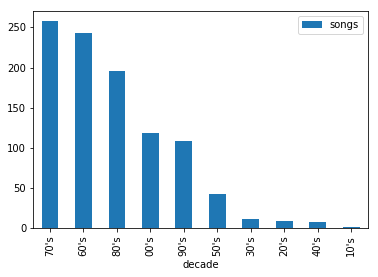

In [105]:
decade_counts.plot(x = 'decade', y = 'songs', kind = 'bar')

In [107]:
# Decent, let's see if we can fix order of index, go back to line plot
d2 = decade_counts.set_index('decade')
d2

,songs
decade,
70's,258
60's,243
80's,196
00's,118
90's,108
50's,42
30's,11
20's,9
40's,8


In [108]:
d2 = d2.reindex(["10's", "20's", "30's", "40's", "50's", "60's", "70's", "80's", "90's", "00's"])
d2

,songs
decade,
10's,1
20's,9
30's,11
40's,8
50's,42
60's,243
70's,258
80's,196
90's,108


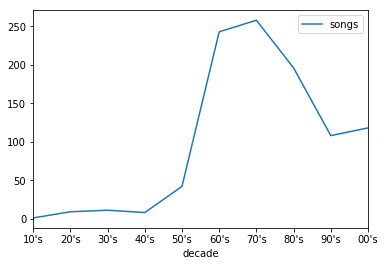

In [111]:
d2.plot()

In [117]:
# Make a stacked bar chart across decades
# First make smol df of just decade and theme
df_smol = df_full[['decade', 'theme']]
df_smol.head()

,decade,theme
0,80's,Love
1,00's,Love
2,60's,Love
3,60's,Love
4,60's,Love


In [120]:
counts = df_full.groupby(['decade', 'theme']).agg(len)
counts.head()

title  artist  year  rank
decade theme                                       
00's   Heartbreak            23      23    23  23.0
       Life and death        18      18    18  18.0
       Love                   9       9     9   9.0
       Party songs           24      24    24  24.0
       People and places      9       9     9   9.0

In [125]:
test = counts[['title']]
test.head()

title
decade theme                   
00's   Heartbreak            23
       Life and death        18
       Love                   9
       Party songs           24
       People and places      9

In [127]:
test.columns = ['Songs']
test.head()

Songs
decade theme                   
00's   Heartbreak            23
       Life and death        18
       Love                   9
       Party songs           24
       People and places      9

In [132]:
test2 = test.unstack(0)
test2

Songs                                                  
decade                00's 10's 20's 30's 40's  50's  60's  70's  80's  90's
theme                                                                       
Heartbreak            23.0  NaN  NaN  1.0  NaN   4.0  36.0  37.0  24.0  20.0
Life and death        18.0  NaN  2.0  1.0  2.0   7.0  26.0  33.0  19.0  23.0
Love                   9.0  NaN  1.0  1.0  NaN  11.0  53.0  42.0  12.0  10.0
Party songs           24.0  NaN  NaN  1.0  1.0   1.0  15.0  55.0  47.0  18.0
People and places      9.0  1.0  3.0  4.0  4.0  15.0  52.0  28.0  23.0   6.0
Politics and protest  20.0  NaN  2.0  3.0  1.0   NaN  33.0  36.0  37.0   9.0
Sex                   15.0  NaN  1.0  NaN  NaN   4.0  28.0  27.0  34.0  22.0

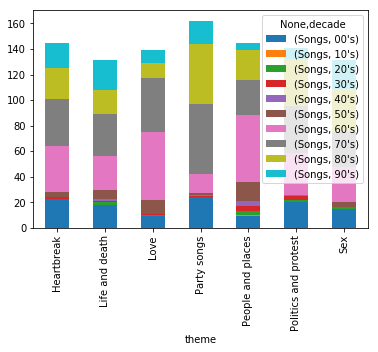

In [134]:
test2.plot(kind = 'bar', stacked = True)

In [135]:
test3 = test.unstack(1)
test3

Songs                                                     \
theme  Heartbreak Life and death  Love Party songs People and places   
decade                                                                 
00's         23.0           18.0   9.0        24.0               9.0   
10's          NaN            NaN   NaN         NaN               1.0   
20's          NaN            2.0   1.0         NaN               3.0   
30's          1.0            1.0   1.0         1.0               4.0   
40's          NaN            2.0   NaN         1.0               4.0   
50's          4.0            7.0  11.0         1.0              15.0   
60's         36.0           26.0  53.0        15.0              52.0   
70's         37.0           33.0  42.0        55.0              28.0   
80's         24.0           19.0  12.0        47.0              23.0   
90's         20.0           23.0  10.0        18.0               6.0   

                                   
theme  Politics and protest   Sex  
decade                             
00's                   20.0  15.0  
10's                    NaN   NaN  
20's                    2.0   1.0  
30's                    3.0   NaN  
40's                    1.0   NaN  
50's                    NaN   4.0  
60's                   33.0  28.0  
70's                   36.0  27.0  
80's                   37.0  34.0  
90's                    9.0  22.0

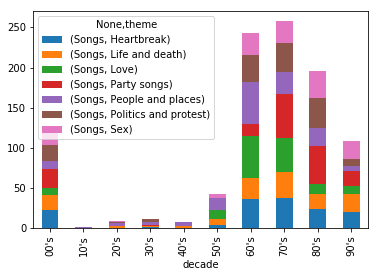

In [138]:
test3.plot(kind = 'bar', stacked = True)

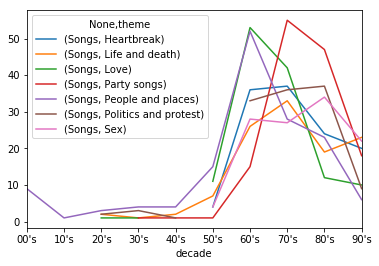

In [139]:
test3.plot()

In [140]:
%whos

Variable        Type         Data/Info
--------------------------------------
RS              DataFrame        rank                 <...>n\n[100 rows x 2 columns]
RSlist          list         n=100
counts          DataFrame                             <...>\n\n[57 rows x 4 columns]
d2              DataFrame            songs\ndecade    <...>s      108\n00's      118
decYear         function     <function decYear at 0x113b83578>
decade_counts   DataFrame      decade  songs\n0   70's<...>s      8\n9   10's      1
df              DataFrame               theme         <...>n\n[994 rows x 5 columns]
df2             DataFrame              a         b    <...>53243  0.089122  0.127238
df_full         DataFrame               theme         <...>n\n[994 rows x 6 columns]
df_smol         DataFrame        decade        theme\n<...>n\n[994 rows x 2 columns]
df_title        DataFrame         index               <...>n\n[994 rows x 5 columns]
eighties        DataFrame               theme         <...>